In [1]:
# Common imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Base parameters
n_timesteps = 365  # One year
np.random.seed(42)  # For reproducibility

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')
time_numeric = np.arange(n_timesteps)

# Calendar features (common across all datasets)
day_of_week = dates.dayofweek  # 0=Monday, 6=Sunday
is_weekend = (day_of_week >= 5).astype(int)
month = dates.month
day_of_week_sin = np.sin(2 * np.pi * day_of_week / 7)
day_of_week_cos = np.cos(2 * np.pi * day_of_week / 7)
day_of_month_sin = np.sin(2 * np.pi * dates.day / 30)
day_of_month_cos = np.cos(2 * np.pi * dates.day / 30)
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# Common holidays
is_holiday = np.zeros(n_timesteps)
major_holidays = [0, 31, 59, 120, 185, 245, 335, 358]  # Approx: Jan 1, Feb 1, Mar 1, May 1, Jul 5, Sep 2, Dec 1, Dec 24
for day in major_holidays:
    if day < n_timesteps:
        is_holiday[day] = 1

random_holidays = np.random.choice(range(n_timesteps), size=10, replace=False)
is_holiday[random_holidays] = 1

# Function to get temperature with seasonal pattern
def get_temperature(amplitude=10, phase_shift=np.pi, noise_scale=2):
    temp_seasonal = 15 + amplitude * np.sin(2 * np.pi * time_numeric / 365 + phase_shift)
    temp_noise = np.random.randn(n_timesteps) * noise_scale
    return temp_seasonal + temp_noise

# Function to get promotion periods
def get_promotions(num_promotions=3, avg_duration=15):
    is_promotion = np.zeros(n_timesteps)
    promo_starts = np.random.choice(range(n_timesteps - avg_duration), size=num_promotions, replace=False)
    
    for start in promo_starts:
        duration = int(avg_duration * (0.8 + 0.4 * np.random.random()))  # Variable duration
        end = min(start + duration, n_timesteps)
        is_promotion[start:end] = 1
    
    return is_promotion

Original dataset:


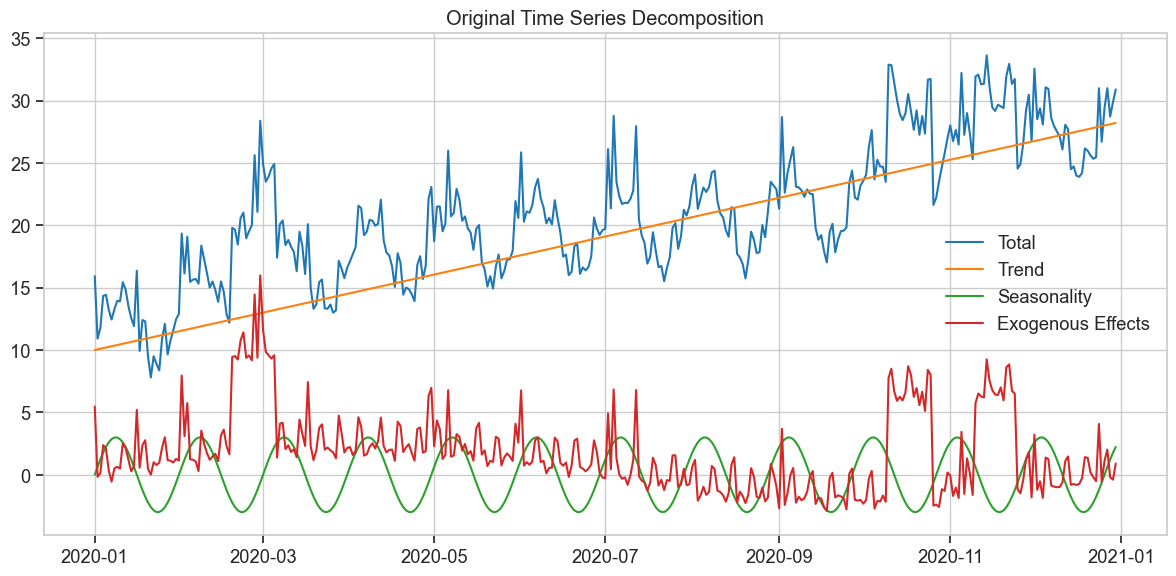

In [2]:
# Cell 1: Original Dataset (for reference)

# Parameters
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi)
is_promotion = get_promotions(num_promotions=3, avg_duration=15)

# Exogenous effects
temp_effect = -0.2 * (temperature - 15)  # Normalized effect
weekend_effect = 2.0 * is_weekend
holiday_effect = 5.0 * is_holiday
promotion_effect = 8.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_original = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Original dataset:")
df_original.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_original.index, df_original['value'], label='Total')
plt.plot(df_original.index, df_original['trend'], label='Trend')
plt.plot(df_original.index, df_original['seasonality'], label='Seasonality')
plt.plot(df_original.index, df_original['exog_effects'], label='Exogenous Effects')

plt.title('Original Time Series Decomposition')
plt.legend()
plt.tight_layout()
plt.show()

Strong trend dataset:


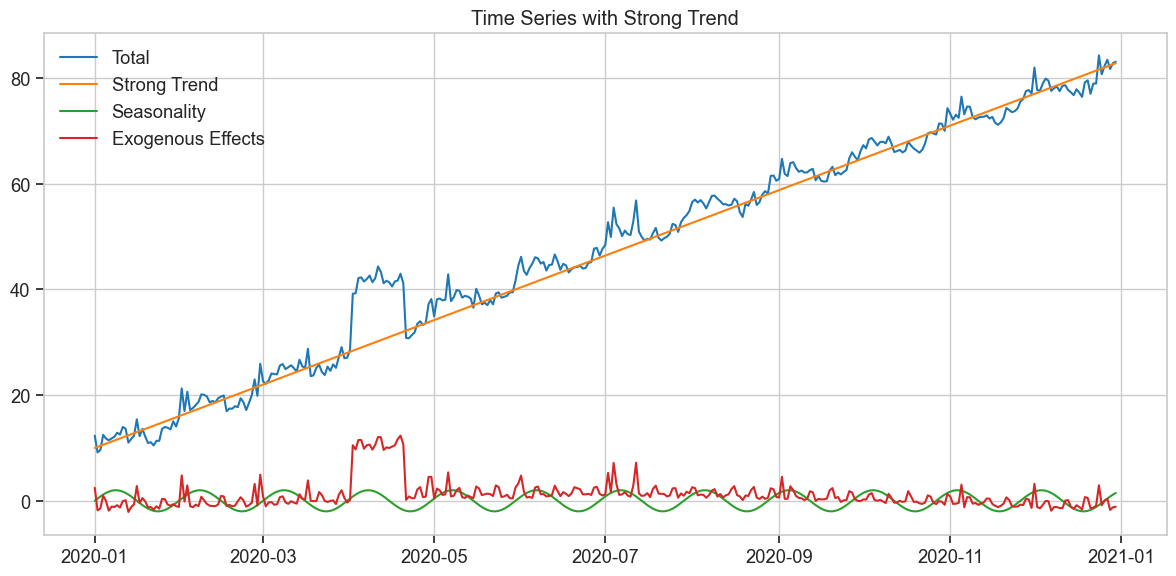

In [3]:
# Cell 2: Dataset with Strong Trend

# Parameters - strong upward trend
trend_slope = 0.2  # Much steeper trend (4x stronger)
seasonal_amplitude = 2  # Slightly weaker seasonality
seasonal_period = 30
noise_std = 0.4  # Slightly more noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=8, phase_shift=np.pi/2)  # Different temp pattern
is_promotion = get_promotions(num_promotions=2, avg_duration=20)  # Fewer, longer promotions

# Exogenous effects - different coefficients
temp_effect = -0.15 * (temperature - 15)
weekend_effect = 1.5 * is_weekend  # Reduced weekend effect
holiday_effect = 4.0 * is_holiday  # Reduced holiday effect
promotion_effect = 10.0 * is_promotion  # Stronger promotion effect

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_strong_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Strong trend dataset:")
df_strong_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_strong_trend.index, df_strong_trend['value'], label='Total')
plt.plot(df_strong_trend.index, df_strong_trend['trend'], label='Strong Trend')
plt.plot(df_strong_trend.index, df_strong_trend['seasonality'], label='Seasonality')
plt.plot(df_strong_trend.index, df_strong_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Strong Trend')
plt.legend()
plt.tight_layout()
plt.show()

Strong seasonality dataset:


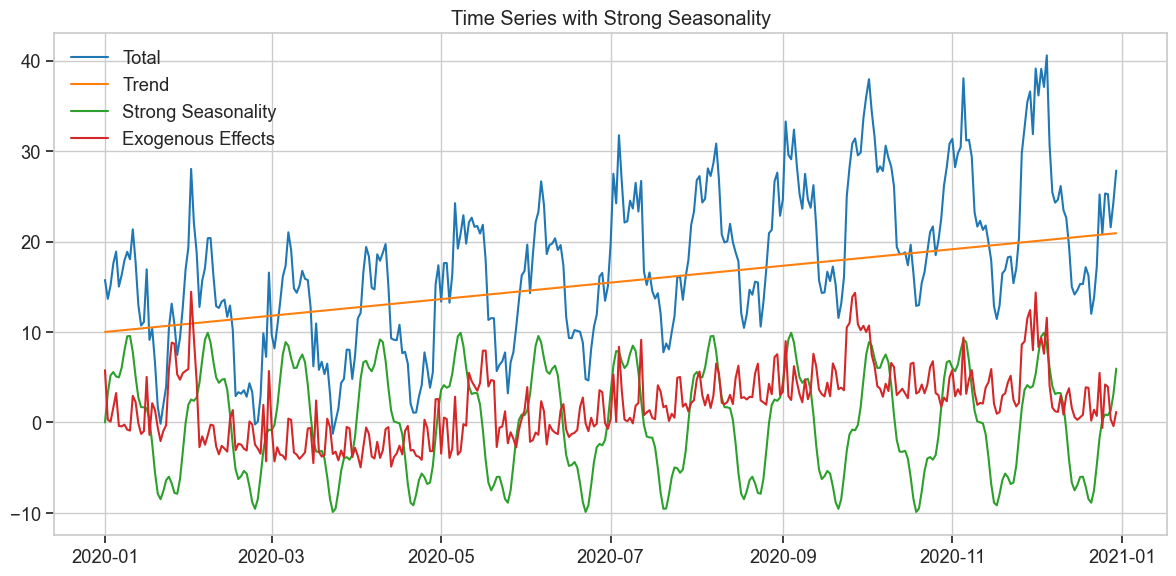

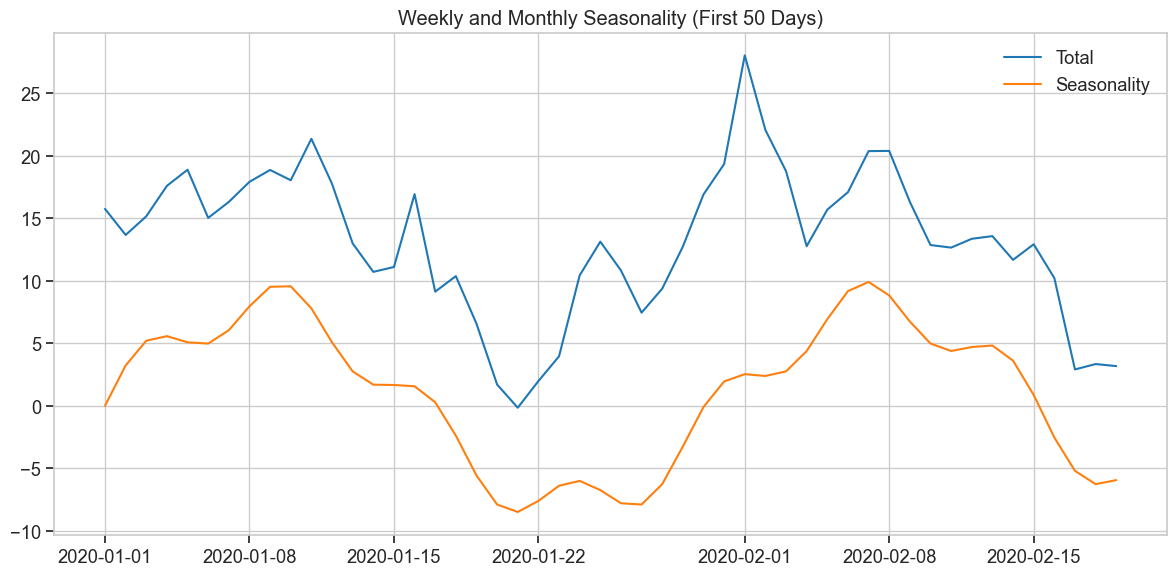

In [4]:
# Cell 3: Dataset with Strong Seasonality

# Parameters - strong seasonality
trend_slope = 0.03  # Weaker trend
seasonal_amplitude = 8  # Much stronger seasonality
seasonal_period = 30
noise_std = 0.5

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Add second seasonality component (weekly)
weekly_seasonality = 2 * np.sin(2 * np.pi * time_numeric / 7)
seasonality += weekly_seasonality

# Create exogenous variables
temperature = get_temperature(amplitude=12, phase_shift=0)  # Different temp pattern
is_promotion = get_promotions(num_promotions=4, avg_duration=10)  # More promotions, shorter duration

# Exogenous effects
temp_effect = -0.3 * (temperature - 15)  # Stronger temperature effect
weekend_effect = 3.0 * is_weekend  # Stronger weekend effect 
holiday_effect = 6.0 * is_holiday  # Stronger holiday effect
promotion_effect = 7.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_strong_seasonality = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Strong seasonality dataset:")
df_strong_seasonality.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_strong_seasonality.index, df_strong_seasonality['value'], label='Total')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['trend'], label='Trend')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['seasonality'], label='Strong Seasonality')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Strong Seasonality')
plt.legend()
plt.tight_layout()
plt.show()

# Zoom in to see weekly patterns
plt.figure(figsize=(12, 6))
plt.plot(df_strong_seasonality.index[0:50], df_strong_seasonality['value'][0:50], label='Total')
plt.plot(df_strong_seasonality.index[0:50], df_strong_seasonality['seasonality'][0:50], label='Seasonality')

plt.title('Weekly and Monthly Seasonality (First 50 Days)')
plt.legend()
plt.tight_layout()
plt.show()

Changing trend dataset:


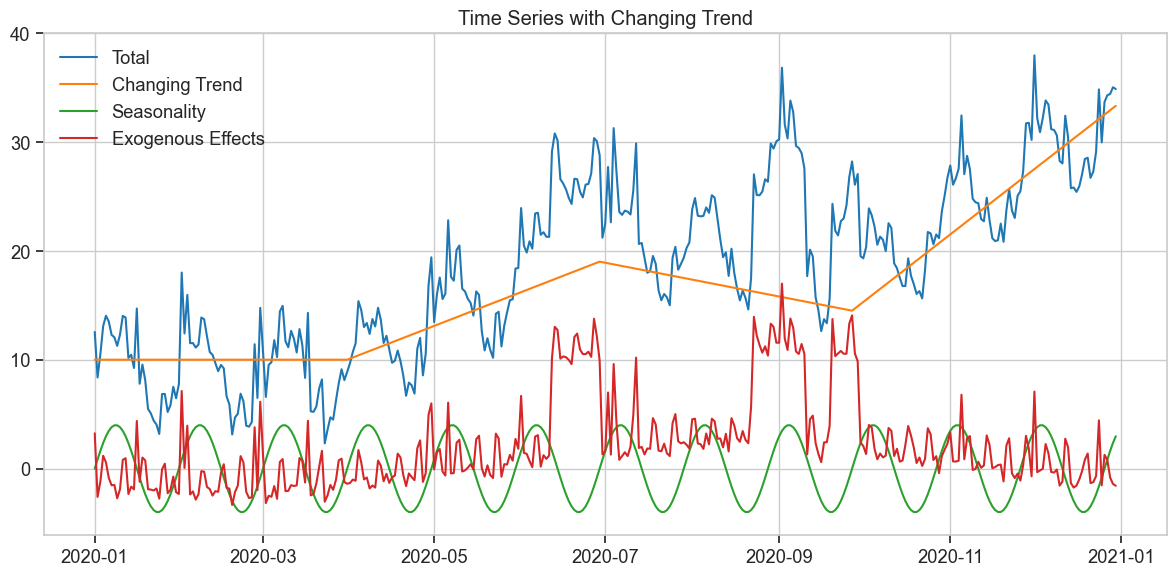

In [5]:
# Cell 4: Dataset with Changing Trend (regime change)

# Parameters
seasonal_amplitude = 4
seasonal_period = 30
noise_std = 0.4

# Generate piece-wise trend with change points
trend = np.zeros(n_timesteps)
# First segment: Flat
trend[0:90] = 10
# Second segment: Upward trend
trend[90:180] = 10 + 0.1 * np.arange(90)
# Third segment: Downward trend
trend[180:270] = 19 - 0.05 * np.arange(90)
# Fourth segment: Steep upward trend
trend[270:] = 14.5 + 0.2 * np.arange(len(trend[270:]))

# Seasonality
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=9, phase_shift=np.pi/4)
is_promotion = get_promotions(num_promotions=5, avg_duration=12)

# Exogenous effects
temp_effect = -0.25 * (temperature - 15)
weekend_effect = 2.5 * is_weekend
holiday_effect = 6.0 * is_holiday
promotion_effect = 9.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_changing_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Changing trend dataset:")
df_changing_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_changing_trend.index, df_changing_trend['value'], label='Total')
plt.plot(df_changing_trend.index, df_changing_trend['trend'], label='Changing Trend')
plt.plot(df_changing_trend.index, df_changing_trend['seasonality'], label='Seasonality')
plt.plot(df_changing_trend.index, df_changing_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Changing Trend')
plt.legend()
plt.tight_layout()
plt.show()

Exogenous-dominant dataset:


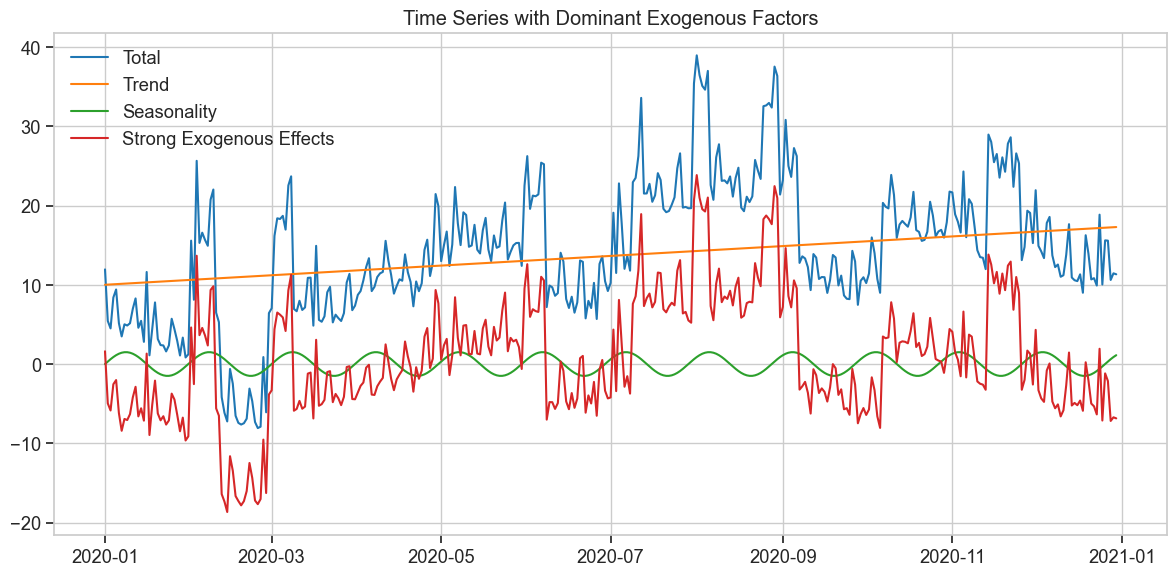

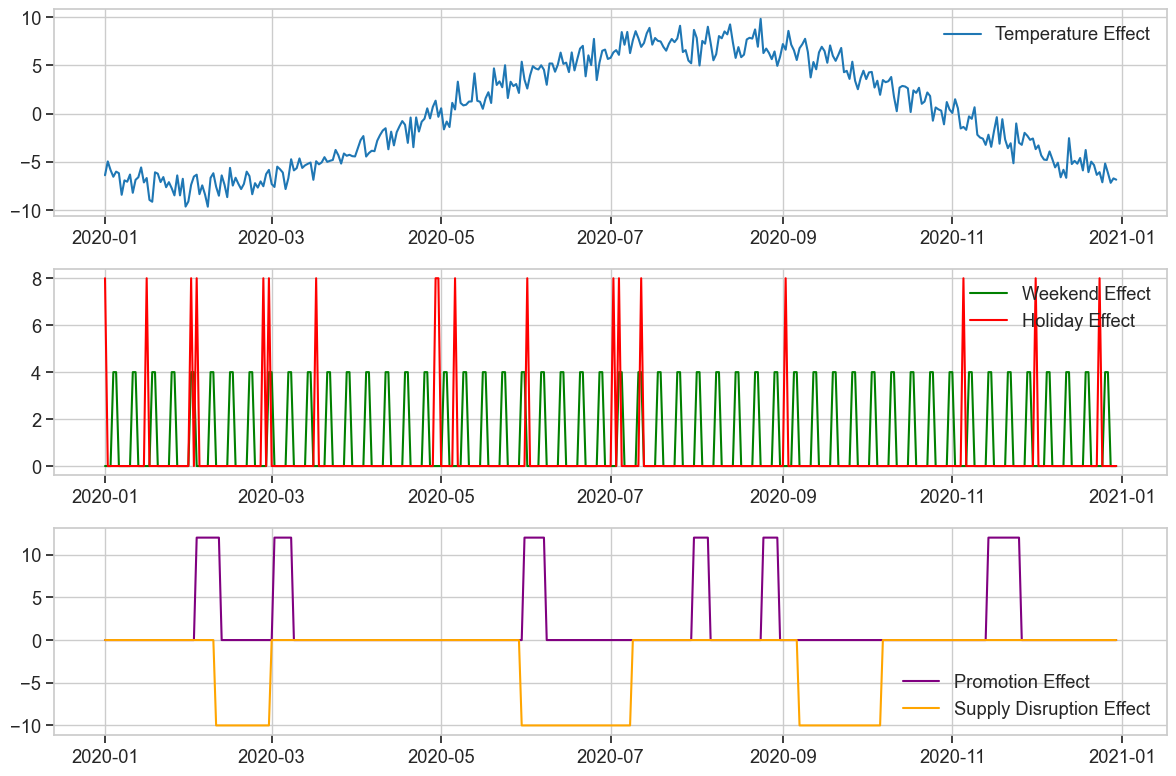

In [6]:
# Cell 5: Dataset with Dominant Exogenous Factors

# Parameters - weak trend and seasonality, strong exogenous factors
trend_slope = 0.02  # Very weak trend
seasonal_amplitude = 1.5  # Weak seasonality
seasonal_period = 30
noise_std = 0.3

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables with stronger effects
temperature = get_temperature(amplitude=15, phase_shift=np.pi/3)  # More extreme temperature swings
is_promotion = get_promotions(num_promotions=8, avg_duration=8)  # More frequent, shorter promotions

# Create additional exogenous factor: supply chain disruptions
supply_disruption = np.zeros(n_timesteps)
disruption_periods = [(40, 60), (150, 190), (250, 280)]
for start, end in disruption_periods:
    supply_disruption[start:end] = 1

# Exogenous effects - much stronger
temp_effect = -0.5 * (temperature - 15)  # Stronger temperature effect
weekend_effect = 4.0 * is_weekend  # Stronger weekend effect
holiday_effect = 8.0 * is_holiday  # Stronger holiday effect
promotion_effect = 12.0 * is_promotion  # Stronger promotion effect
supply_effect = -10.0 * supply_disruption  # Strong negative effect from supply disruptions

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect + supply_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_exogenous_dominant = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'supply_disruption': supply_disruption,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Exogenous-dominant dataset:")
df_exogenous_dominant.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['value'], label='Total')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['trend'], label='Trend')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['seasonality'], label='Seasonality')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['exog_effects'], label='Strong Exogenous Effects')

plt.title('Time Series with Dominant Exogenous Factors')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize individual exogenous factors
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_exogenous_dominant.index, temp_effect, label='Temperature Effect')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_exogenous_dominant.index, weekend_effect, color='green', label='Weekend Effect')
plt.plot(df_exogenous_dominant.index, holiday_effect, color='red', label='Holiday Effect')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_exogenous_dominant.index, promotion_effect, color='purple', label='Promotion Effect')
plt.plot(df_exogenous_dominant.index, supply_effect, color='orange', label='Supply Disruption Effect')
plt.legend()

plt.tight_layout()
plt.show()

High noise dataset:


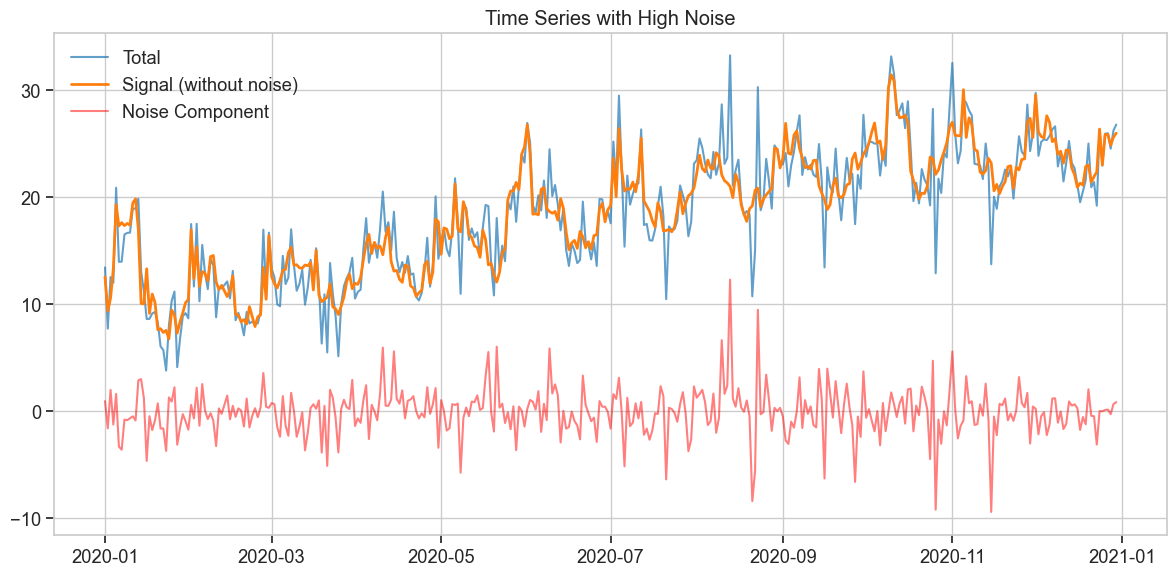

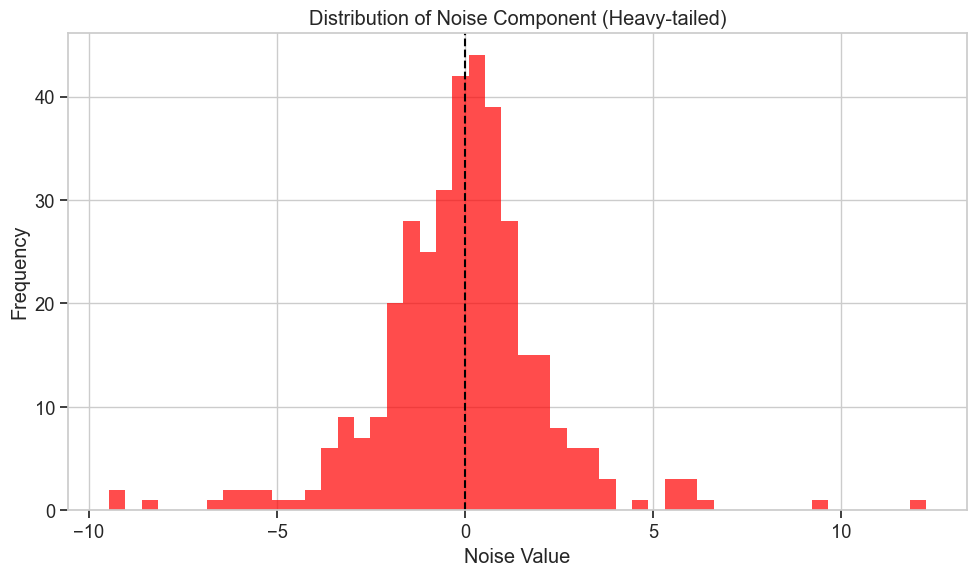

In [7]:
# Cell 6: Dataset with High Noise

# Parameters - high noise with heavy tails
trend_slope = 0.04  # Small trend
seasonal_amplitude = 2.5  # Moderate seasonality
seasonal_period = 30
noise_std = 1.5  # Much higher noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=8, phase_shift=np.pi/6)
is_promotion = get_promotions(num_promotions=3, avg_duration=10)

# Exogenous effects - moderate
temp_effect = -0.2 * (temperature - 15)
weekend_effect = 2.0 * is_weekend
holiday_effect = 4.0 * is_holiday
promotion_effect = 6.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# Generate heavy-tailed noise (Student's t-distribution with df=3)
np.random.seed(42)  # Reset seed for consistency
noise = np.random.standard_t(df=3, size=n_timesteps) * noise_std

# Add some outliers
outlier_positions = np.random.choice(range(n_timesteps), size=5, replace=False)
outlier_magnitudes = np.random.choice([-1, 1], size=5) * np.random.uniform(5, 10, size=5)
for pos, mag in zip(outlier_positions, outlier_magnitudes):
    noise[pos] += mag

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_high_noise = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("High noise dataset:")
df_high_noise.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_high_noise.index, df_high_noise['value'], label='Total', alpha=0.7)
plt.plot(df_high_noise.index, df_high_noise['trend'] + df_high_noise['seasonality'] + df_high_noise['exog_effects'], 
         label='Signal (without noise)', linewidth=2)
plt.plot(df_high_noise.index, df_high_noise['noise'], label='Noise Component', alpha=0.5, color='red')

plt.title('Time Series with High Noise')
plt.legend()
plt.tight_layout()
plt.show()

# Histogram of noise to show heavy tails
plt.figure(figsize=(10, 6))
plt.hist(df_high_noise['noise'], bins=50, alpha=0.7, color='red')
plt.title('Distribution of Noise Component (Heavy-tailed)')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Noise Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Geometric Brownian Motion dataset:


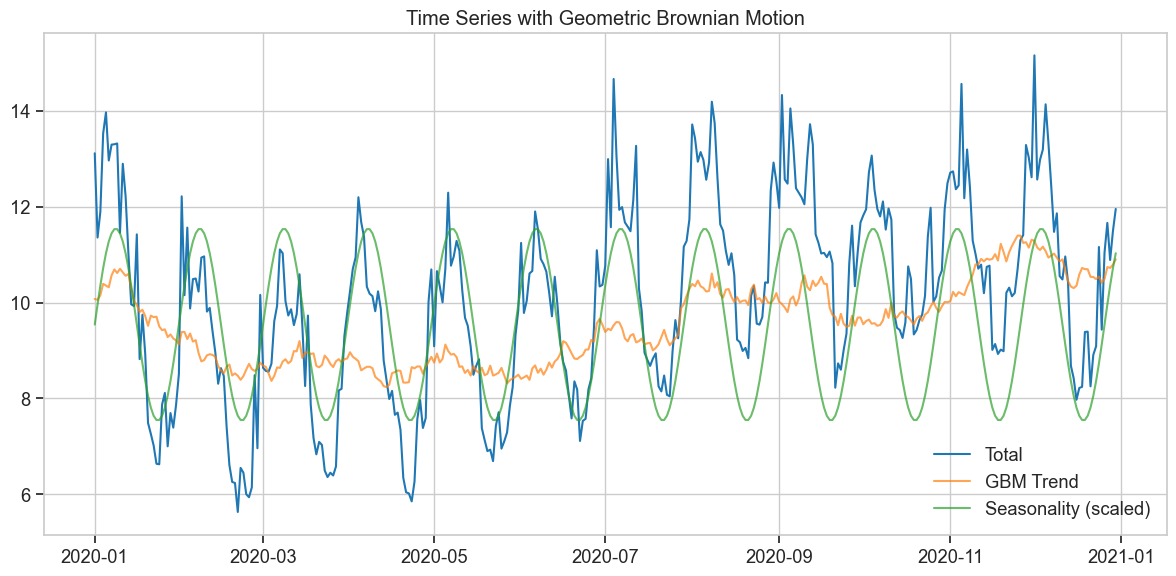

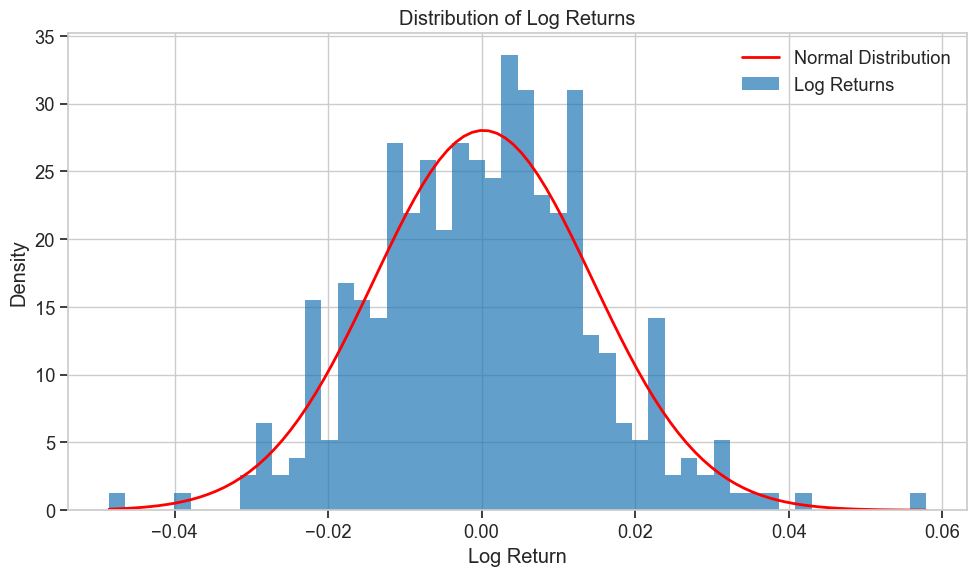

In [12]:
# Cell 7: Dataset with Geometric Brownian Motion (GBM)

# Parameters for Geometric Brownian Motion
mu = 0.0002  # Drift (daily)
sigma = 0.015  # Volatility (daily)
S0 = 10  # Initial value
seasonal_amplitude = 2  # Still add some seasonality
seasonal_period = 30

# Generate GBM path
np.random.seed(42)  # Reset for consistency
dt = 1  # Daily time steps
brownian_increments = np.random.normal(0, np.sqrt(dt), n_timesteps)
W = np.cumsum(brownian_increments)  # Brownian motion path

# GBM formula: S(t) = S0 * exp((mu - 0.5*sigma^2)*t + sigma*W(t))
time = np.arange(n_timesteps) * dt
drift_term = (mu - 0.5 * sigma**2) * time
diffusion_term = sigma * W
trend = S0 * np.exp(drift_term + diffusion_term)

# Add seasonality
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables with moderate effects
temperature = get_temperature(amplitude=8, phase_shift=np.pi/4)
is_promotion = get_promotions(num_promotions=4, avg_duration=10)

# Exogenous effects - moderate, with multiplicative effect
temp_effect = -0.01 * (temperature - 15) * trend  # Multiplicative effect (proportion of trend)
weekend_effect = 0.1 * is_weekend * trend  # Weekends increase by 10%
holiday_effect = 0.2 * is_holiday * trend  # Holidays increase by 20%
promotion_effect = 0.15 * is_promotion * trend  # Promotions increase by 15%

# Combine effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# No additional noise term - GBM already has stochasticity
values = trend + seasonality + exog_effects

# Create DataFrame
df_gbm = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos,
    'gbm_drift': drift_term,
    'gbm_diffusion': diffusion_term
}, index=dates)

# Display the first few rows
print("Geometric Brownian Motion dataset:")
df_gbm.head()

# Log returns calculation
df_gbm['log_returns'] = np.log(df_gbm['trend'] / df_gbm['trend'].shift(1)).fillna(0)

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_gbm.index, df_gbm['value'], label='Total', linewidth=1.5)
plt.plot(df_gbm.index, df_gbm['trend'], label='GBM Trend', alpha=0.7)
plt.plot(df_gbm.index, df_gbm['seasonality'] + df_gbm['trend'].mean(), label='Seasonality (scaled)', alpha=0.7)

plt.title('Time Series with Geometric Brownian Motion')
plt.legend()
plt.tight_layout()
plt.show()

# Look at log returns (should be normally distributed)
plt.figure(figsize=(10, 6))
plt.hist(df_gbm['log_returns'][1:], bins=50, alpha=0.7, density=True)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')

# Overlay a normal distribution for comparison
x = np.linspace(min(df_gbm['log_returns'][1:]), max(df_gbm['log_returns'][1:]), 100)
plt.plot(x, norm.pdf(x, df_gbm['log_returns'][1:].mean(), df_gbm['log_returns'][1:].std()), 
         linewidth=2, color='red')
plt.legend(['Normal Distribution', 'Log Returns'])
plt.tight_layout()
plt.show()

Dataset with seasonal heteroskedasticity:


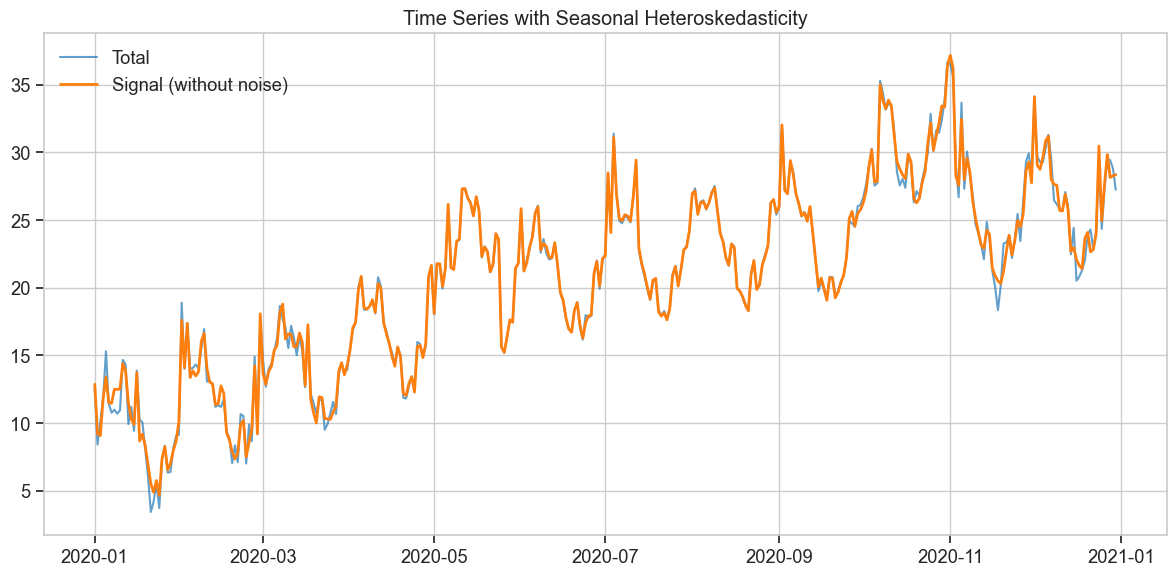

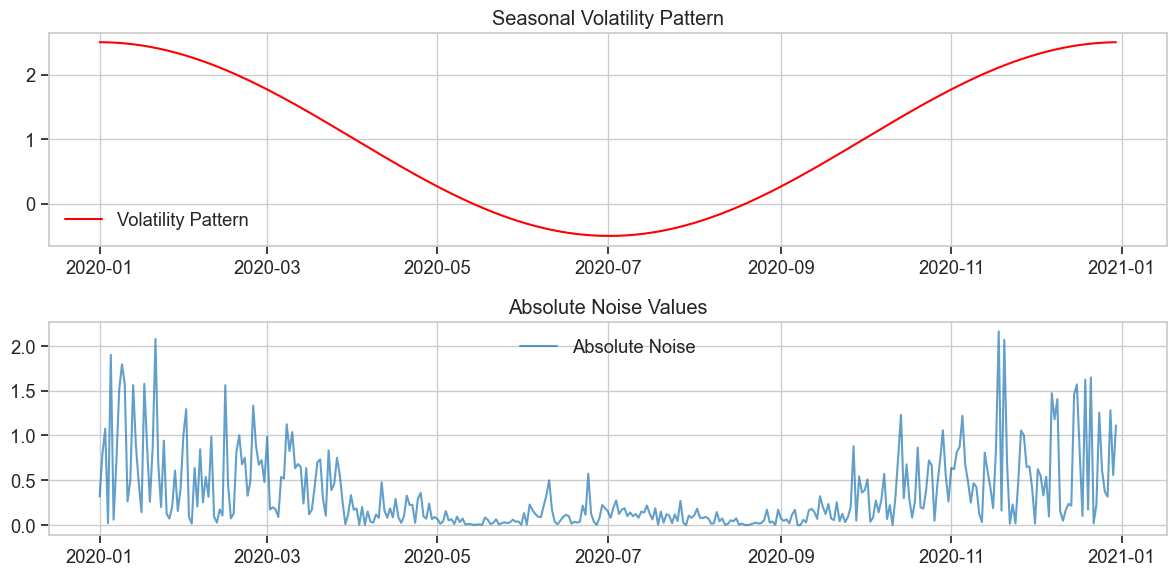

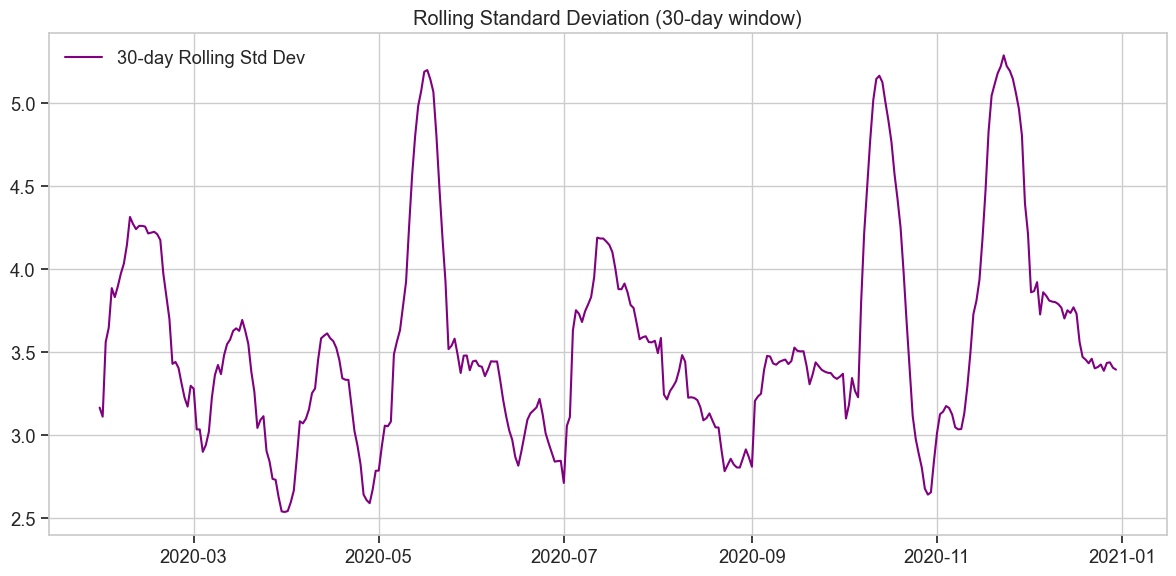

In [10]:
# Cell 8: Dataset with Seasonal Heteroskedasticity (variance changes with seasons)

# Parameters
trend_slope = 0.05
seasonal_amplitude = 4
seasonal_period = 30
base_noise_std = 0.4  # Base level of noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi/2)
is_promotion = get_promotions(num_promotions=3, avg_duration=15)

# Exogenous effects
temp_effect = -0.2 * (temperature - 15)
weekend_effect = 2.0 * is_weekend
holiday_effect = 5.0 * is_holiday
promotion_effect = 7.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# Create seasonal volatility (higher in winter, lower in summer)
# Higher variance in Q1 and Q4, lower in Q2 and Q3
seasonal_volatility = 1.0 + 1.5 * np.cos(2 * np.pi * time_numeric / 365)  # Higher in winter
noise = np.random.randn(n_timesteps) * base_noise_std * seasonal_volatility

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_heteroskedastic = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'seasonal_volatility': seasonal_volatility,  # Store the volatility pattern
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Dataset with seasonal heteroskedasticity:")
df_heteroskedastic.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_heteroskedastic.index, df_heteroskedastic['value'], label='Total', alpha=0.7)
plt.plot(df_heteroskedastic.index, df_heteroskedastic['trend'] + df_heteroskedastic['seasonality'] + df_heteroskedastic['exog_effects'],
         label='Signal (without noise)', linewidth=2)

plt.title('Time Series with Seasonal Heteroskedasticity')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize the seasonal volatility pattern
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_heteroskedastic.index, df_heteroskedastic['seasonal_volatility'], label='Volatility Pattern', color='red')
plt.title('Seasonal Volatility Pattern')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_heteroskedastic.index, abs(df_heteroskedastic['noise']), label='Absolute Noise', alpha=0.7)
plt.title('Absolute Noise Values')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate rolling window standard deviation to show changing volatility
rolling_std = df_heteroskedastic['value'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df_heteroskedastic.index, rolling_std, label='30-day Rolling Std Dev', color='purple')
plt.title('Rolling Standard Deviation (30-day window)')
plt.legend()
plt.tight_layout()
plt.show()

Multiple regimes dataset:


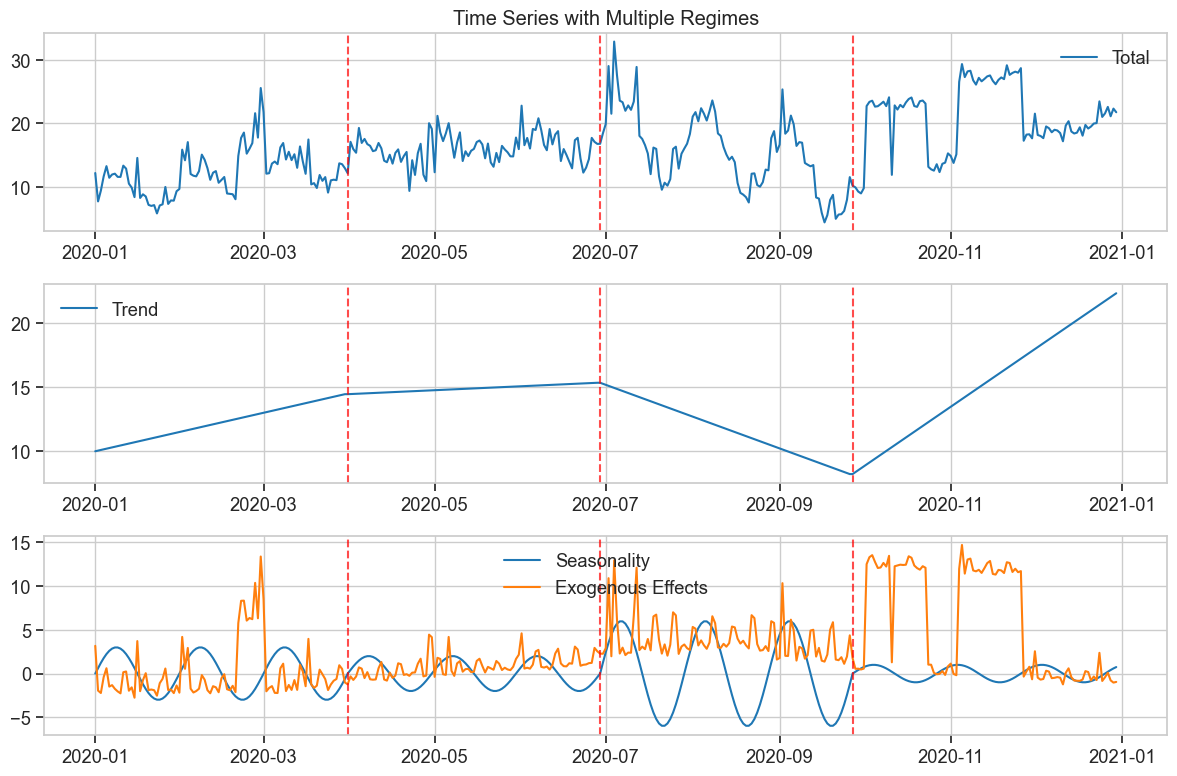

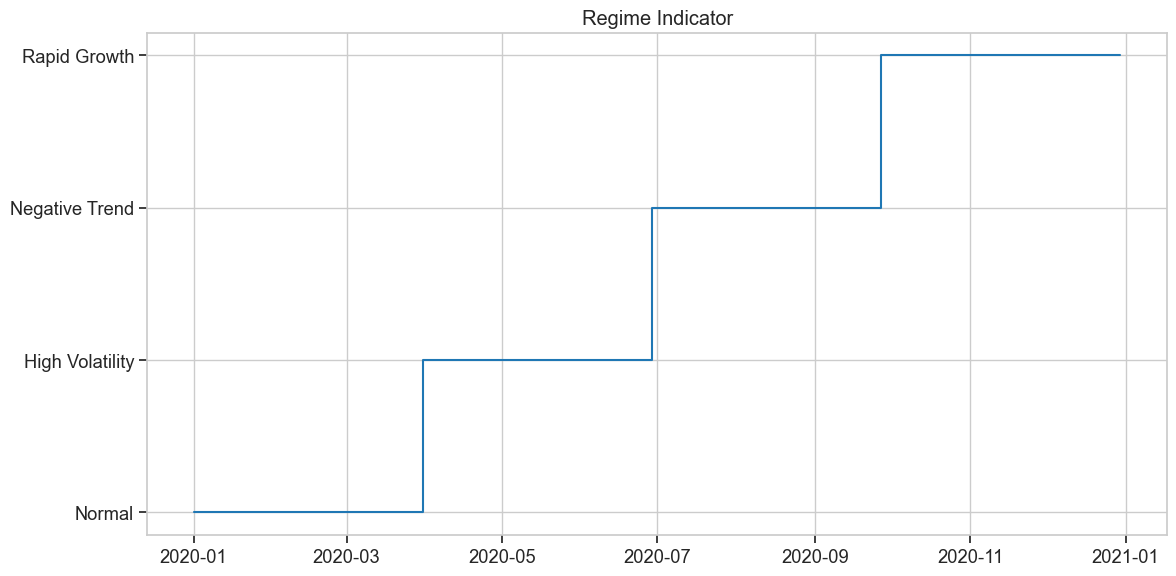

In [11]:
# Cell 9: Dataset with Multiple Regimes and Structural Breaks

# Parameters
noise_std = 0.5

# Define regimes
n_regimes = 4
regime_lengths = [90, 90, 90, 95]  # Adding up to 365 days
regime_boundaries = np.cumsum(regime_lengths)
regime_boundaries = np.insert(regime_boundaries, 0, 0)

# Set different parameters for each regime
regime_params = {
    # regime 0: normal
    0: {
        'trend_slope': 0.05,
        'seasonal_amplitude': 3,
        'seasonal_period': 30,
        'temp_effect_coef': -0.2,
        'weekend_effect_coef': 2.0,
        'holiday_effect_coef': 5.0,
        'promotion_effect_coef': 8.0,
    },
    # regime 1: high volatility with weak trend
    1: {
        'trend_slope': 0.01,
        'seasonal_amplitude': 2,
        'seasonal_period': 30,
        'temp_effect_coef': -0.15,
        'weekend_effect_coef': 1.5,
        'holiday_effect_coef': 4.0,
        'promotion_effect_coef': 6.0,
        'volatility_multiplier': 3.0,  # Higher volatility
    },
    # regime 2: strong seasonality with negative trend
    2: {
        'trend_slope': -0.08,
        'seasonal_amplitude': 6,
        'seasonal_period': 30,
        'temp_effect_coef': -0.3,
        'weekend_effect_coef': 3.0,
        'holiday_effect_coef': 7.0,
        'promotion_effect_coef': 9.0,
    },
    # regime 3: rapid growth with diminished seasonality
    3: {
        'trend_slope': 0.15,
        'seasonal_amplitude': 1,
        'seasonal_period': 30,
        'temp_effect_coef': -0.1,
        'weekend_effect_coef': 1.0,
        'holiday_effect_coef': 3.0,
        'promotion_effect_coef': 12.0,
    }
}

# Initialize arrays for components
trend = np.zeros(n_timesteps)
seasonality = np.zeros(n_timesteps)
temp_effect = np.zeros(n_timesteps)
weekend_effect = np.zeros(n_timesteps)
holiday_effect = np.zeros(n_timesteps)
promotion_effect = np.zeros(n_timesteps)
noise = np.zeros(n_timesteps)
regime_indicator = np.zeros(n_timesteps)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi/3)
is_promotion = get_promotions(num_promotions=5, avg_duration=12)

# Fill components by regime
for regime in range(n_regimes):
    start_idx = regime_boundaries[regime]
    end_idx = regime_boundaries[regime + 1]
    regime_length = end_idx - start_idx
    local_time = np.arange(regime_length)
    
    # Get parameters for this regime
    params = regime_params[regime]
    
    # Set components for this regime
    # Trend (with smooth transition at regime boundaries)
    if regime == 0:
        base_level = 10
    else:
        # Use last value from previous regime as starting point
        base_level = trend[start_idx - 1]
    
    trend[start_idx:end_idx] = base_level + params['trend_slope'] * local_time
    
    # Seasonality
    seasonality[start_idx:end_idx] = params['seasonal_amplitude'] * \
                                   np.sin(2 * np.pi * local_time / params['seasonal_period'])
    
    # Exogenous effects with regime-specific coefficients
    temp_effect[start_idx:end_idx] = params['temp_effect_coef'] * (temperature[start_idx:end_idx] - 15)
    weekend_effect[start_idx:end_idx] = params['weekend_effect_coef'] * is_weekend[start_idx:end_idx]
    holiday_effect[start_idx:end_idx] = params['holiday_effect_coef'] * is_holiday[start_idx:end_idx]
    promotion_effect[start_idx:end_idx] = params['promotion_effect_coef'] * is_promotion[start_idx:end_idx]
    
    # Noise (potentially with different volatility by regime)
    vol_multiplier = params.get('volatility_multiplier', 1.0)
    noise[start_idx:end_idx] = np.random.randn(regime_length) * noise_std * vol_multiplier
    
    # Mark the regime
    regime_indicator[start_idx:end_idx] = regime

# Combine effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_regimes = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'regime': regime_indicator,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Multiple regimes dataset:")
df_regimes.head()

# Quick visualization
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_regimes.index, df_regimes['value'], label='Total')
# Add vertical lines at regime boundaries
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.title('Time Series with Multiple Regimes')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_regimes.index, df_regimes['trend'], label='Trend')
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_regimes.index, df_regimes['seasonality'], label='Seasonality')
plt.plot(df_regimes.index, df_regimes['exog_effects'], label='Exogenous Effects')
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the different regimes
plt.figure(figsize=(12, 6))
plt.step(df_regimes.index, df_regimes['regime'], where='post')
plt.title('Regime Indicator')
plt.yticks([0, 1, 2, 3], ['Normal', 'High Volatility', 'Negative Trend', 'Rapid Growth'])
plt.tight_layout()
plt.show()

Negative trend dataset:


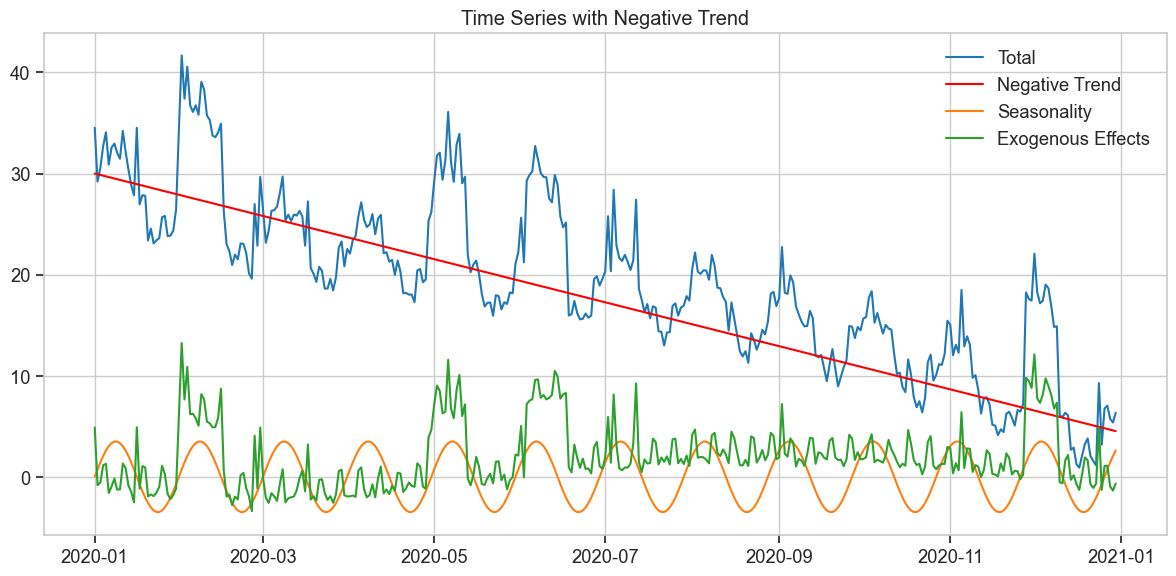

In [14]:
# Cell 12: Dataset with Negative Trend

# Parameters - negative trend
trend_slope = -0.07  # Downward trend
seasonal_amplitude = 3.5  # Moderate seasonality
seasonal_period = 30
noise_std = 0.45

# Generate base components
initial_level = 30  # Higher starting point to avoid negative values
trend = initial_level + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=9, phase_shift=np.pi/6)
is_promotion = get_promotions(num_promotions=4, avg_duration=14)

# Exogenous effects
temp_effect = -0.22 * (temperature - 15)
weekend_effect = 2.2 * is_weekend
holiday_effect = 5.5 * is_holiday
promotion_effect = 7.5 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_negative_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)


# Display the first few rows
print("Negative trend dataset:")
df_negative_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_negative_trend.index, df_negative_trend['value'], label='Total')
plt.plot(df_negative_trend.index, df_negative_trend['trend'], label='Negative Trend', color='red')
plt.plot(df_negative_trend.index, df_negative_trend['seasonality'], label='Seasonality')
plt.plot(df_negative_trend.index, df_negative_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Negative Trend')
plt.legend()
plt.tight_layout()
plt.show()